In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statistics

In [ ]:
def rSquared(y1,y_pred):
  estimateError = ((y_pred-y1)**2).sum()
  meanOfMeasured = y1.sum()/len(y1)
  variability = ((y1- meanOfMeasured)**2).sum()
  return 1 - estimateError/variability

In [ ]:
def variance(imY):
  meanOfValues =imY.sum()/len(imY)
  lsY = []
  for i in imY:
    ((imY- meanOfValues)**2).sum()
    lsY.append(i)
  return(lsY)
  Variance = lsY.sum()/len(lsY)
  print(Variance)

In [ ]:
def insideEdition():
  dataset = pd.read_csv('CNN.csv')

  x= dataset.iloc[:, -3].values ## published time
  X = pd.to_datetime(x)
  print(X)
  y = dataset.iloc[:, -2].values ##comments
  y1 = dataset.iloc[:, -1].values ### views
  yset2 = dataset.iloc[:, 1].values ##likes
### data member is now private  yset3 = dataset.iloc[:, 2].values ##dislikes
  yset2 = yset2.reshape(-1, 1)
  y = y.reshape(-1, 1)
### x2 = dataset.iloc[:, -2:].values did not need to use two columns for simple linear regression but i will be implementig polynomial regression
  plt.figure(figsize=(20,10))
  plt.xlabel('Date')
  plt.ylabel('Comments')
  plt.scatter(x,y)
  plt.figure(figsize=(20,10))
  plt.xlabel('Date')
  plt.ylabel('Views')
  plt.scatter(X,y1)
  X_train, X_test, y_train, y_test = train_test_split(yset2, y1, test_size= 1, random_state = 0)
  X_train1, X_test1, y_train1, y_test1 = train_test_split(y, y1, test_size= 1, random_state = 0)
  regressor = LinearRegression()
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  regressor.fit(X_train1, y_train1)
  y_pred = regressor.predict(X_test)
  y_pred1 = regressor.predict(X_test1)
  plt.figure(figsize=(20,10))
  plt.scatter(X_train1, y_train1, color = 'red')
  plt.plot(X_train1, regressor.predict(X_train1), color = 'blue')

  plt.title('Youtube videos (Training set)')
  plt.xlabel('Comments')
  plt.ylabel('Views')
  plt.show()
  print(variance(y_pred))
  print(rSquared(y, y1))
  plt.figure(figsize=(20,10))
  plt.scatter(X_train, y_train, color = 'red')
  plt.plot(X_train, regressor.predict(X_train), color = 'blue')

  plt.title('Youtube videos (Training set)')
  plt.xlabel('likes')
  plt.ylabel('Views')
  plt.show()

  print(variance(y_pred))
  print(rSquared(yset2, y1))
  print(variance(y_pred1))
  print(rSquared(y, y1))
  X_train2, X_test2, y_train2, y_test2 = train_test_split(y, y1, test_size= 0.2, random_state = 0)
  plt.figure(figsize=(20,10))
  poly = PolynomialFeatures(degree = 5) ### According to Geeks for Geeks at " https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/ " , is an implementation for polynomial regression.
  X_poly = poly.fit_transform(y)

  poly.fit(X_poly, y1)
  lin2 = LinearRegression()
  lin2.fit(X_poly, y1)

  plt.scatter(y, y1, color = 'blue')

  plt.plot(y, lin2.predict(poly.fit_transform(y)),marker='|', color = 'red')
  plt.title('Polynomial Regression/ youtube Video views for Inside edition')
  plt.xlabel('comments')
  plt.ylabel('Views')

  plt.show()
  # regression coefficients
  print('Coefficients: \n', regressor.coef_)

# variance score: 1 means perfect prediction
  print('Variance score: {}'.format(regressor.score(X_test2, y_test2)))
  y_pred2 = lin2.predict(poly.fit_transform(X_train2))

  plt.figure(figsize=(20,10))
  plt.scatter(regressor.predict(X_train1), regressor.predict(X_train1) - y_train1,
            color = "green", s = 10, label = 'Train data')

## plotting residual errors in test data
  plt.scatter(regressor.predict(X_test1), regressor.predict(X_test1) - y_test1,
            color = "blue", s = 10, label = 'Test data')

## plotting line for zero residual error
  plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

## plotting legend
  plt.legend(loc = 'upper right')

## plot title
  plt.title("Residual errors")

## function to show plot
  plt.show()
  print("This is the printed values for residual errors for the training set:\n\n\n\n",regressor.predict(X_train1), regressor.predict(X_train1) - y_train1)
  print("This is the printed values for the testing set:\n\n\n\n\n",regressor.predict(X_test1), regressor.predict(X_test1) - y_test1)
  print("predicted values: \n\n\n\n\n\n",y_pred)
  print("predicted values: \n\n\n\n\n\n\n\n",y_pred2)


### : -------------------------------------------------------Linear Regression--------------------------------------------------------

######--------------------------------------------------------Number of View Predictions---------------------------------------------------
## note: there is a positive correlation of the number views that positively affects the number of comments. [obvious information, because more views increases the opportunity for more comments; however this doesnt show a positve affecting future views.]


######--------------------------------------------------------Polynomial Regression---------------------------------------------------

######--------------------------------------------------------Number of View Predictions---------------------------------------------------





In [ ]:
comments = []
likes = []
views = []
dataset = pd.read_csv('CNN.csv')
likes = dataset.iloc[:, -2].values ##comments
views = dataset.iloc[:, 1].values ##likes
comments =  dataset.iloc[:, -1].values ### views


In [ ]:
dataList1 = pd.DataFrame(comments)
datalist2 = pd.DataFrame(likes)


# calculating the  standard devaition using std() function
standarddevList1 = dataList1.std()
standarddevList2 = datalist2.std()


In [ ]:
print(standarddevList1)
print(standarddevList2)


0    919.974307
dtype: float64
0    2670.725289
dtype: float64


In [ ]:
commentsMean = statistics.mean(comments)
likesMean = statistics.mean(likes)
viewsMean = statistics.mean(views)
rV2L = likesMean/viewsMean
rV2C = commentsMean/viewsMean

In [ ]:
print(commentsMean)

867


In [ ]:
print(commentsMean)
print(likesMean)
print(viewsMean)
print(likes)
print(views)
print(comments)
print(rV2L)
print(rV2C)

867
2025
91112
[ 310  171  220 2165 7915  625  187  573  440 2485  378 7162 1553  421
  538 1164 1004 7587 5354  266]
[  9556   6685   4008  60417 224314  38340   4952  49366  19014 164010
  17431 176083  58209  20621  37877  91079  60221 480397 283967  15696]
[ 147  133  101  977 3261  276   19  207  658 1122  303 1545  940   38
 1181  914  649 2523 2299   49]
0.022225392922995874
0.00951576082184564


DatetimeIndex(['1970-01-01 00:00:00.000009556',
               '1970-01-01 00:00:00.000006685',
               '1970-01-01 00:00:00.000004008',
               '1970-01-01 00:00:00.000060417',
               '1970-01-01 00:00:00.000224314',
               '1970-01-01 00:00:00.000038340',
               '1970-01-01 00:00:00.000004952',
               '1970-01-01 00:00:00.000049366',
               '1970-01-01 00:00:00.000019014',
               '1970-01-01 00:00:00.000164010',
               '1970-01-01 00:00:00.000017431',
               '1970-01-01 00:00:00.000176083',
               '1970-01-01 00:00:00.000058209',
               '1970-01-01 00:00:00.000020621',
               '1970-01-01 00:00:00.000037877',
               '1970-01-01 00:00:00.000091079',
               '1970-01-01 00:00:00.000060221',
               '1970-01-01 00:00:00.000480397',
               '1970-01-01 00:00:00.000283967',
               '1970-01-01 00:00:00.000015696'],
              dtype='datetime64[ns]', f

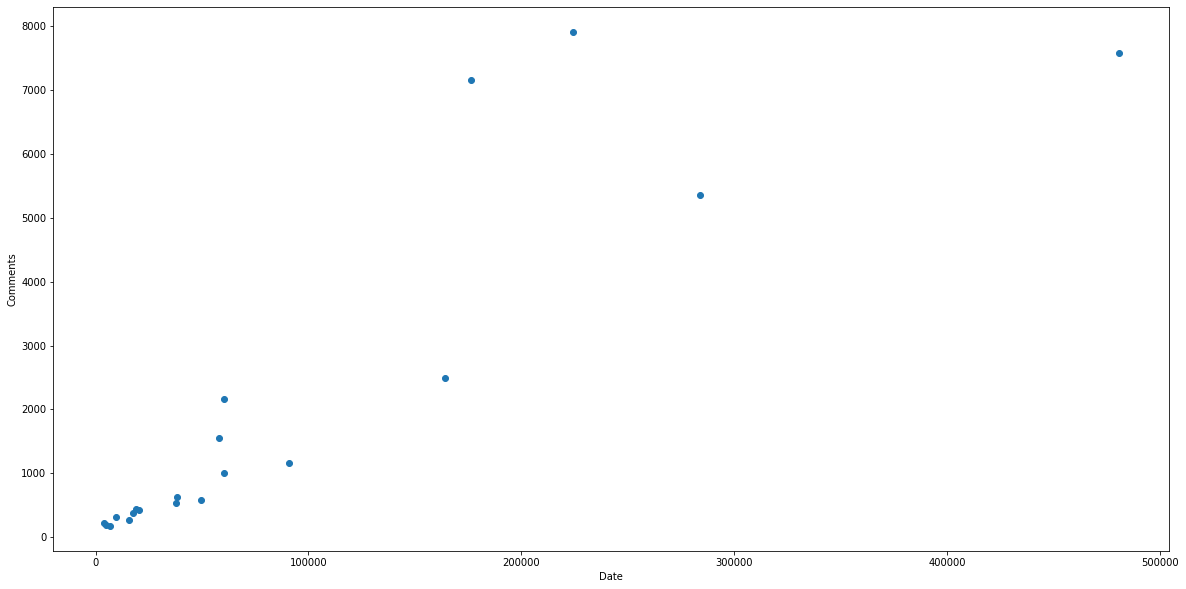

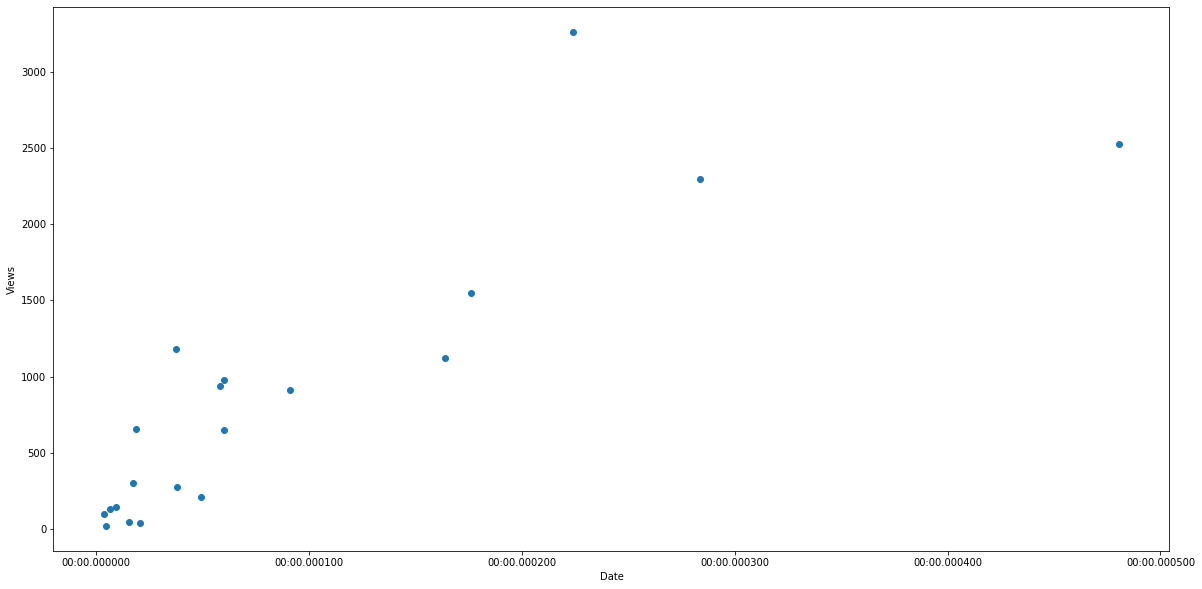

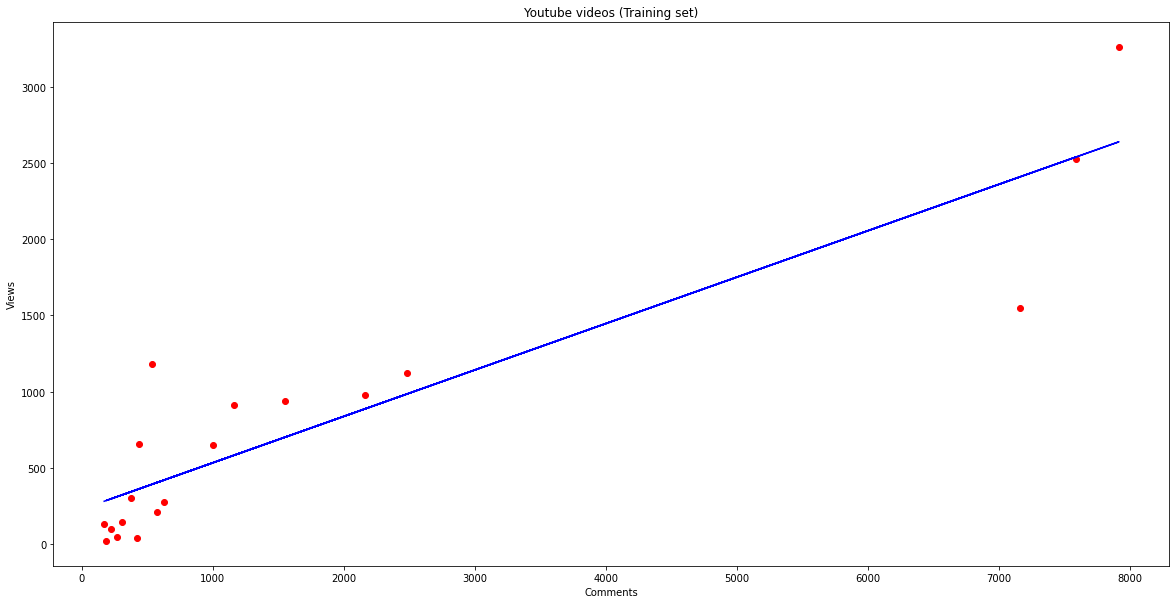

[86681.07850823406]
-25.33651060626982


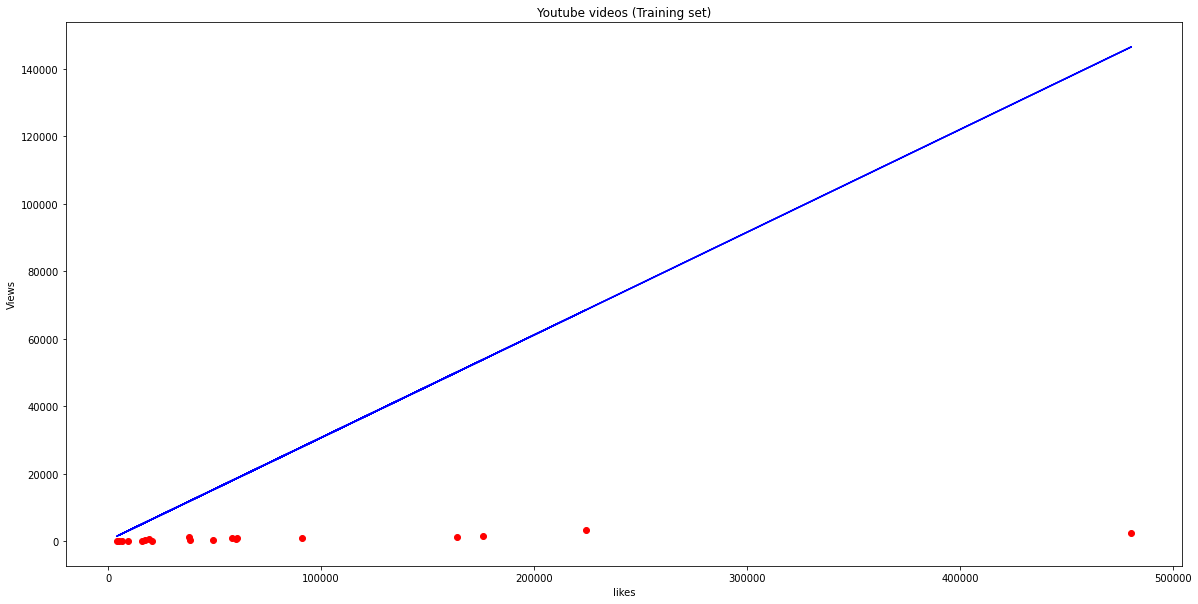

[86681.07850823406]
-30.659537711565882
[1858.2934558456723]
-25.33651060626982


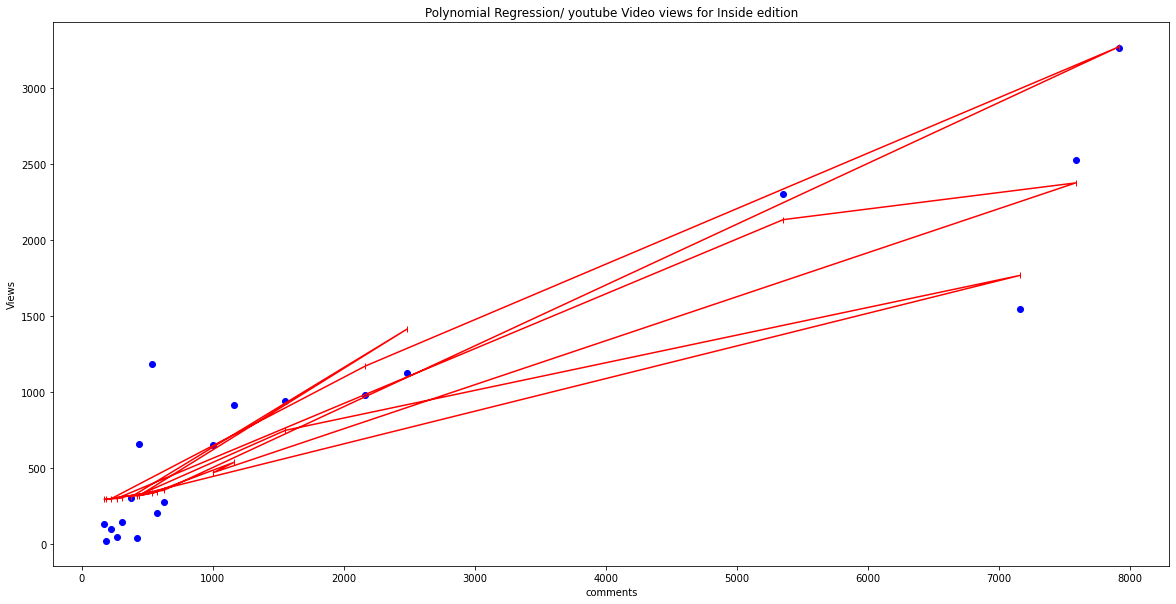

Coefficients: 
 [0.30444662]
Variance score: 0.8866774119736875


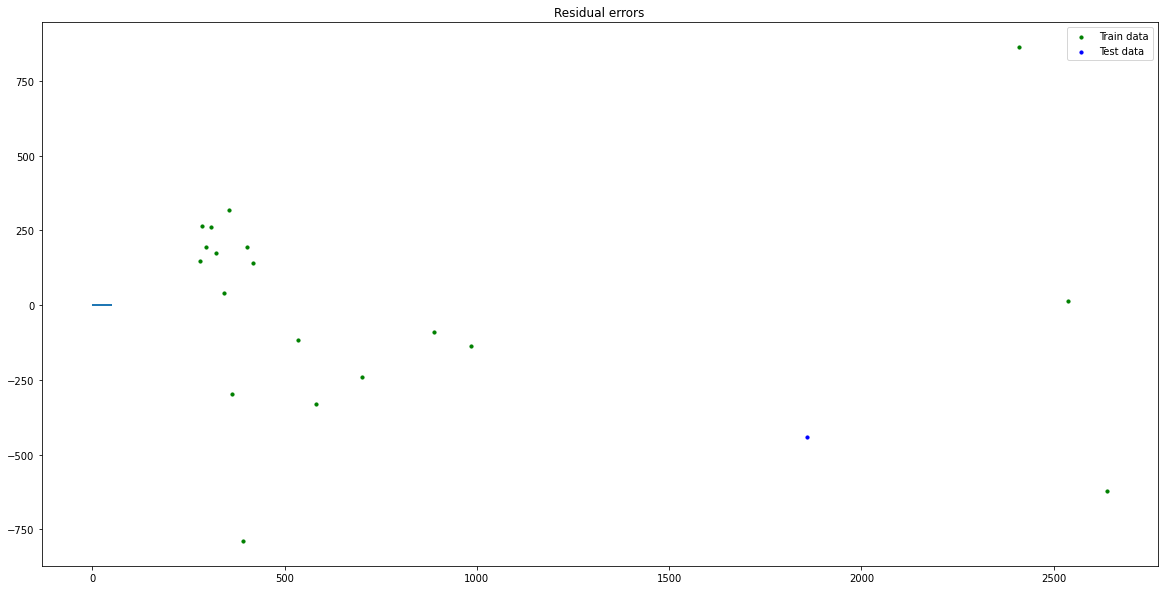

This is the printed values for residual errors for the training set:



 [ 280.34664458  309.26907311  362.24278431  343.36709412 2538.1227496
  285.21779044  356.45829861 2637.98123969  295.26452877  418.56540829
  392.07855269  984.83611425  402.73418426  533.9506758  2408.73293776
  887.41319709  322.66472422  582.66213437  701.09186804] [ 147.34664458  260.26907311 -295.75721569   40.36709412   15.1227496
  266.21779044  318.45829861 -623.01876031  194.26452877  142.56540829
 -788.92144731 -137.16388575  195.73418426 -115.0493242   863.73293776
  -89.58680291  175.66472422 -331.33786563 -238.90813196]
This is the printed values for the testing set:




 [1858.29345585] [-440.70654415]
predicted values: 





 [86681.07850823]
predicted values: 







 [ 310.35325705 2374.75050402  293.79247457  315.95951681 3269.01793907
  295.73498378  352.86822754  334.99243379 1414.54465756  341.79451641
  469.55881469 1766.50307833 1170.53894761  302.9421185   537.82241338
  747.13268536]


In [ ]:
insideEdition()

In [ ]:
##### Visually, from what I can tell the best method for regression was just using a simple linear test.
### The linear regression method visually seems to show that there is a positive relationship with comment count to view count
## Same with the likes, even though the likes is displayed in powers. The graph is still showing  a linear relationship, even though it may look like the points on the graph are not moving upward, they are moving upward incrementally and proportional to the perspective given in the graph.
##  The greater number of views leads to a greater number of comments and likes or increasing the probability that there will be a like and a comment for every view


In [ ]:
#Ho : r1 <= r2
#Ha :  r2 > r1
##1 = comments
##2 = likes
#Null hypothesis states that the likes to views ratio is greater than or equal to the comments to views ratio
#The alternative hypothesis states that the comments ratio is greater than the likes ratio
#t = (sampleMean - the null hypothesis/ sample deviation )
#(6287- 3219) / (7524/root 20)
#
#T statistic is 1.82356633572
# p value is  p-value ≈ 0.068218
## and the results state there is moderate evidence that comments affect views more than likes do. It cannot be concluded with this but there is moderate evidence with this test.
